In [1]:
import Pkg; 

if split(pwd(),"/")[end] == "random_walk"
    cd(joinpath(@__DIR__, "../../"))
    Pkg.activate("Project.toml")
end

using MorphoMol

using CairoMakie
using Distances
using LinearAlgebra
using Random
using Rotations
using StaticArrays

  Activating project at `~/Doktor/Code/MorphoMol/MorphoMol.jl`


In [4]:
T = 0.5
β = 1.0 / T

σ = 1.0

energy(x) = x[1]^2, Dict{String, Any}()
perturbation(x) = x .+ randn() * σ
rwm = MorphoMol.Algorithms.RandomWalkMetropolis(energy, perturbation, β)
output = Dict{String, Vector}(
    "states" => Vector{Vector{Float64}}([]),
    "Es" => Vector{Float64}([]),
    "αs" => Vector{Float64}([]) #Acceptance rates
)
x = rand(1) .- 0.5
simulation_time_minutes = 0.5
output = MorphoMol.Algorithms.simulate!(rwm, x, simulation_time_minutes, output);
output["αs"][end]

0.5001253927416859

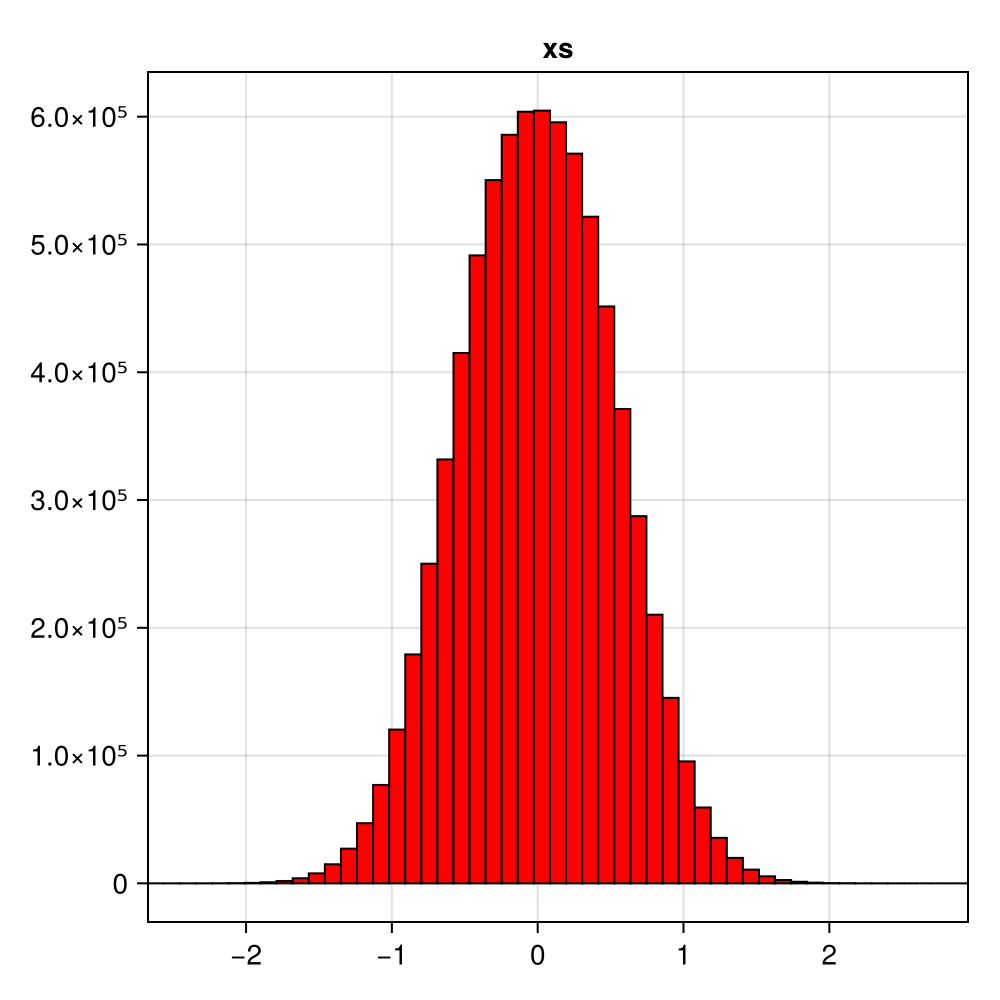

In [3]:
f = Figure(size = (500, 500))
bin_number = 51
xs = [e[1] for e in output["states"]]
hist(f[1, 1], xs, bins = bin_number, color = :red, strokewidth = 1, strokecolor = :black, axis = (title = "xs", limits = ((minimum(xs), maximum(xs)), nothing),))
f